## Interpreting Eval Result of 0401

with bimodal
- and benchmark 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the log
df = pd.read_csv('../../models/output/eval-log-0325.csv')
df['query'] = df['code_sample_idx'].apply(str) + '. ' + df['query']

In [3]:
df.shape

(180500, 9)

In [4]:
df.ix[0,:]

code_sample_idx                                  1
query               1. add cross lines to the bars
baseline                                    RANDOM
candidate                          plt.xlabel@size
rank                                             1
is_gt                                            0
score                                            0
answer_rank                                      0
answer             plt.bar.set_hatch plt.bar@hatch
Name: 0, dtype: object

In [5]:
df_bimodal = df[df.baseline.str.startswith('bimodal')]
df_bimodal.shape

(18050, 9)

In [6]:
df_bimodal_answer_ranks = \
    df_bimodal[df_bimodal['rank'] == 1] \
    [['code_sample_idx','query','answer','answer_rank','score']]
df_bimodal_answer_ranks.shape

(361, 5)

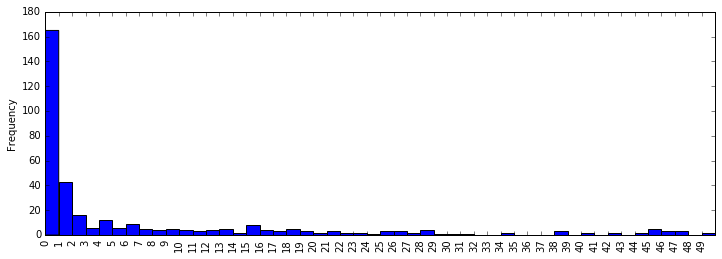

In [7]:
plt.figure(figsize=(12,4))
df_bimodal_answer_ranks.answer_rank.plot(kind='hist', bins=50)
plt.xticks(range(0,50), rotation=90);

In [8]:
answer_ranks = df_bimodal_answer_ranks.answer_rank.tolist()
mrr = 0.0
count = 0
for x in answer_ranks:
    if x > 0:
        count += 1
        mrr += 1 / x
mrr /= count
print mrr  # MRR not considering 160+ items (out of 361) that are ranked outside 50

0.219387755102


In [9]:
sum([x < 5 and x > 0 for x in answer_ranks]) / len(answer_ranks)

0

In [10]:
sum([x == 1 for x in answer_ranks]) / len(answer_ranks)

0

In [11]:
sum([x > 10 or x == 0 for x in answer_ranks]) / len(answer_ranks)

0

### List of Queries the BiModal performs particularly badly on
`answer_rank` falls outside 50 cut-off, and is thus recorded as 0.

In [12]:
df_bimodal_answer_ranks[df_bimodal_answer_ranks.answer_rank==0]

,code_sample_idx,query,answer,answer_rank,score
450,1,1. add cross lines to the bars,plt.bar.set_hatch plt.bar@hatch,0,8.860505
950,1,1. Add diagonals to each Case labels.,plt.bar.set_hatch plt.bar@hatch,0,8.163554
1450,1,1. Add left-slanting score marks on Case 1,plt.bar.set_hatch plt.bar@hatch,0,14.863974
1950,1,1. Add right-slanting score marks on Case 2,plt.bar.set_hatch plt.bar@hatch,0,17.668039
2450,1,1. Add stripes to the bars.,plt.bar.set_hatch plt.bar@hatch,0,-2.733980
3950,1,1. draw inclinated lines in all the rectangles...,plt.bar.set_hatch plt.bar@hatch,0,-2.551038
4450,1,1. place slanted down lines on blue bars,plt.bar.set_hatch plt.bar@hatch,0,11.980476
4950,1,1. Place slanted up lines on pink bars,plt.bar.set_hatch plt.bar@hatch,0,7.857365
17950,1,1. add space between different points of infor...,plt.bar@width plt.bar.set_width,0,17.731302
18450,1,1. add space between points,plt.bar@width plt.bar.set_width,0,33.438418


### List of GOOD queries

Look closer and you will find quite a number of good cases:
- "1. change the bright blue to a dull blue" --> the word "color" doesn't even appear
- "2. Rotate the pie chart counter clockwise." --> startangle
- "3. make points semi-transparent in scatter graph" --> alpha

In [13]:
df_bimodal_answer_ranks[df_bimodal_answer_ranks.answer_rank==1]

,code_sample_idx,query,answer,answer_rank,score
5450,1,1. Change and lighten bar graph filler color,plt.bar@color,1,10.198856
5950,1,1. Change Case 1 color to pink and Case 2 colo...,plt.bar@color,1,8.918151
6450,1,1. change colour of bars on chart,plt.bar@color,1,8.972803
7950,1,1. change the blue color to sky blue,plt.bar@color,1,19.400654
8450,1,1. change the bright blue to a dull blue,plt.bar@color,1,13.158547
8950,1,1. change the bright red to a dull red,plt.bar@color,1,15.429143
9450,1,1. change the red color to pink,plt.bar@color,1,22.595763
9950,1,1. Color has weakened,plt.bar@color,1,25.369300
10450,1,1. colors of bars are dimed,plt.bar@color,1,25.369300
11450,1,1. fade colors,plt.bar@color,1,25.369300


## Conclusion:
The bad cases fail mostly because language. For example, `grid` will succeed but `gridlines` fails.

The word2vec model we use is based on too simple a corpus. We need to use a much better word2vec model!